In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.read_csv('epl_1819.csv')

## Análise da base de dados
#### Primeiramente verificamos se existe algum dado não preenchido dentro da base

In [2]:
dataframe.isnull().sum()

Team                             0
category                         0
general_league_position          0
finance _live_games_televised    0
finance _tv_revenue              0
general_matches_played           0
general_won                      0
general_draw                     0
general_lost                     0
attack_scored                    0
defence_goals_conceeded          0
general_goal_difference          0
general_points                   0
general_squad_size               0
general_squad_average_age        0
general_squad_foreigners         0
finance _team_market             0
finance _market_average          0
attack_passes                    0
attack_passes_through            0
attack_passes_long               0
attack_passes_back               0
attack_crosses                   0
attack_corners_taken             0
attack_shots                     0
attack_shots_on_target           0
attack_goals_headed              0
attack_goals_penalty             0
attack_goals_box    

#### Após a observação de que não existem dados nulos, podemos seguir com uma análise de como a base se apresenta

In [3]:
dataframe.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,...,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,...,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,...,133,118,412,609,2,762,404,7,56.1,83.3


#### Em seguida, podemos verificar os tipos de cada coluna para tratar aquelas que possuem valor nominal

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
Team                             20 non-null object
category                         20 non-null object
general_league_position          20 non-null int64
finance _live_games_televised    20 non-null int64
finance _tv_revenue              20 non-null int64
general_matches_played           20 non-null int64
general_won                      20 non-null int64
general_draw                     20 non-null int64
general_lost                     20 non-null int64
attack_scored                    20 non-null int64
defence_goals_conceeded          20 non-null int64
general_goal_difference          20 non-null int64
general_points                   20 non-null int64
general_squad_size               20 non-null int64
general_squad_average_age        20 non-null float64
general_squad_foreigners         20 non-null int64
finance _team_market             20 non-null int64
finance _market_average   

#### Antes de começar a alterar os dados, olhamos a matriz de correlação

In [5]:
df = pd.DataFrame(dataframe)
corr = df.corr()
corr.style.background_gradient().set_precision(2)

/home/tacin/.local/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


#### Após percebermos que existem algumas colunas com alta correlação com outras, podemos mesclá-las de forma a criar uma simplificação na base

In [6]:
dataframe['gen_league_gen_lost']=dataframe.general_league_position.combine(dataframe.general_lost, lambda x1, x2: (x1+x2)/2)
dataframe['gen_won_attack_scored']=dataframe.general_won.combine(dataframe.attack_scored, lambda x1, x2: (x1+x2)/2)
dataframe['gen_lost_defence_goals']=dataframe.general_lost.combine(dataframe.defence_goals_conceeded, lambda x1, x2: (x1+x2)/2)
dataframe['attack_pos_attack_accur']=dataframe.attack_posession.combine(dataframe.attack_pass_accuracy, lambda x1, x2: (x1+x2)/2)

In [7]:
df = pd.DataFrame(dataframe)
corr = df.corr()
corr.style.background_gradient().set_precision(2)

In [8]:
dataframe['glgl_gldg']=dataframe.gen_league_gen_lost.combine(dataframe.gen_lost_defence_goals, lambda x1, x2: (x1+x2)/2)
dataframe['gwas_ggd']=dataframe.gen_won_attack_scored.combine(dataframe.general_goal_difference, lambda x1, x2: (x1+x2)/2)


#### Removendo atributos mesclados

In [9]:
del dataframe['general_league_position']

In [10]:
del dataframe['general_lost']

In [11]:
del dataframe['general_won']

In [12]:
del dataframe['attack_scored']

In [13]:
del dataframe['attack_posession']

In [14]:
del dataframe['attack_pass_accuracy']

In [15]:
del dataframe['gen_league_gen_lost']

In [16]:
del dataframe['gen_won_attack_scored']

In [17]:
del dataframe['general_goal_difference']

In [18]:
del dataframe['general_matches_played']

#### Verificação da matriz de correlação

In [19]:
df = pd.DataFrame(dataframe)
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,finance _live_games_televised,finance _tv_revenue,general_draw,defence_goals_conceeded,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes_through,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances_headed,defence_penalty_conceeded,gen_lost_defence_goals,attack_pos_attack_accur,glgl_gldg,gwas_ggd
finance _live_games_televised,1,0.95,-0.23,-0.79,0.85,-0.19,-0.19,0.064,0.91,0.92,0.74,0.26,0.67,0.73,0.79,0.33,0.26,0.79,0.42,-0.47,-0.12,0.21,0.36,-0.44,-0.66,-0.65,-0.37,-0.49,-0.5,-0.37,-0.82,0.79,-0.84,0.83
finance _tv_revenue,0.95,1,-0.2,-0.89,0.95,-0.14,-0.24,-0.003,0.95,0.95,0.81,0.27,0.77,0.81,0.85,0.37,0.3,0.88,0.5,-0.45,-0.15,0.34,0.41,-0.53,-0.71,-0.68,-0.34,-0.37,-0.46,-0.54,-0.92,0.84,-0.95,0.93
general_draw,-0.23,-0.2,1,0.16,-0.25,0.03,0.019,0.12,-0.35,-0.34,-0.26,0.038,-0.25,-0.27,-0.25,-0.24,0.081,-0.28,-0.21,0.3,0.25,-0.23,0.089,-0.031,0.2,0.4,0.49,0.29,0.29,-0.11,0.12,-0.27,0.11,-0.27
defence_goals_conceeded,-0.79,-0.89,0.16,1,-0.92,0.27,0.21,0.07,-0.85,-0.86,-0.73,-0.39,-0.83,-0.8,-0.76,-0.53,-0.24,-0.83,-0.4,0.63,0.13,-0.35,-0.37,0.75,0.72,0.5,0.12,0.27,0.35,0.59,0.99,-0.7,0.98,-0.93
general_points,0.85,0.95,-0.25,-0.92,1,-0.15,-0.28,-0.075,0.94,0.95,0.78,0.23,0.86,0.83,0.88,0.44,0.34,0.96,0.5,-0.49,-0.24,0.41,0.37,-0.6,-0.67,-0.7,-0.42,-0.3,-0.41,-0.63,-0.95,0.8,-0.97,0.99
general_squad_size,-0.19,-0.14,0.03,0.27,-0.15,1,0.36,0.64,-0.063,-0.13,-0.027,0.069,0.016,0.052,0.053,-0.43,0.18,-0.17,0.48,0.11,0.17,-0.15,0.24,0.23,-0.023,0.016,-0.016,-0.062,-0.37,-0.18,0.24,0.1,0.2,-0.13
general_squad_average_age,-0.19,-0.24,0.019,0.21,-0.28,0.36,1,0.13,-0.19,-0.21,0.01,0.035,-0.19,-0.18,-0.24,-0.4,-0.063,-0.38,-0.041,0.034,0.14,-0.23,0.075,0.18,0.05,0.4,0.29,0.067,-0.17,0.27,0.23,-0.27,0.25,-0.3
general_squad_foreigners,0.064,-0.003,0.12,0.07,-0.075,0.64,0.13,1,0.064,0.031,0.0091,0.38,0.076,0.14,0.11,-0.2,0.13,-0.11,0.29,-0.14,0.22,-0.26,0.39,-0.054,-0.029,0.0021,0.077,-0.44,-0.45,-0.05,0.065,0.26,0.06,-0.047
finance _team_market,0.91,0.95,-0.35,-0.85,0.94,-0.063,-0.19,0.064,1,1,0.82,0.25,0.8,0.85,0.85,0.34,0.24,0.88,0.56,-0.5,-0.25,0.29,0.41,-0.56,-0.7,-0.7,-0.49,-0.47,-0.57,-0.52,-0.88,0.88,-0.9,0.93
finance _market_average,0.92,0.95,-0.34,-0.86,0.95,-0.13,-0.21,0.031,1,1,0.81,0.25,0.8,0.84,0.85,0.38,0.23,0.89,0.53,-0.51,-0.25,0.3,0.4,-0.58,-0.7,-0.69,-0.49,-0.47,-0.55,-0.52,-0.89,0.86,-0.91,0.93


## Inicio do treinamento

In [20]:
train = dataframe
X = train.drop(columns=['Team', 'category', 'attack_passes', 'attack_passes_long', 'attack_passes_back', 'defence_clearances'])
X.shape

(20, 34)

### KMeans
#### Utilização do KMeans para 2 clusters

In [21]:
from sklearn.cluster import KMeans

clf_2 = KMeans(n_clusters = 2, init = 'k-means++',max_iter=200)
clf_2.fit(X)

clusters_kmeans_2 = clf_2.predict(X)

table_kmeans_2 = X
table_kmeans_2=pd.DataFrame(table_kmeans_2)

table_kmeans_2['clusters_kmeans'] = clusters_kmeans_2

qtd_clusters_2=table_kmeans_2['clusters_kmeans'].value_counts()

print("Cluster de indice [0] -> Num de instâncias: ",qtd_clusters_2[0])
print("Cluster de indice [1] -> Num de instâncias: ",qtd_clusters_2[1])

Cluster de indice [0] -> Num de instâncias:  14
Cluster de indice [1] -> Num de instâncias:  6


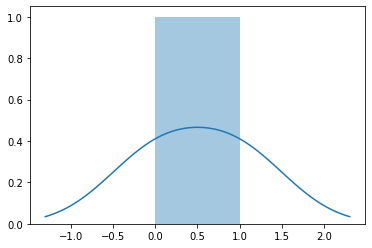

In [22]:
hist_clusters_kmeans = pd.Categorical(qtd_clusters_2).codes
sns.distplot(hist_clusters_kmeans)

#### KMeans para 5 clusters

In [23]:
clf_5 = KMeans(n_clusters = 5, init = 'k-means++',max_iter=200)
clf_5.fit(X)

clusters_kmeans_5 = clf_5.predict(X)

table_kmeans_5 = X

table_kmeans_5=pd.DataFrame(table_kmeans_5)

table_kmeans_5['clusters_kmeans'] = clusters_kmeans_5

qtd_clusters_5=table_kmeans_5['clusters_kmeans'].value_counts()

print("Cluster de indice [0] -> Num de instâncias: ",qtd_clusters_5[0])
print("Cluster de indice [1] -> Num de instâncias: ",qtd_clusters_5[1])
print("Cluster de indice [2] -> Num de instâncias: ",qtd_clusters_5[2])
print("Cluster de indice [3] -> Num de instâncias: ",qtd_clusters_5[3])
print("Cluster de indice [4] -> Num de instâncias: ",qtd_clusters_5[4])

Cluster de indice [0] -> Num de instâncias:  8
Cluster de indice [1] -> Num de instâncias:  4
Cluster de indice [2] -> Num de instâncias:  1
Cluster de indice [3] -> Num de instâncias:  1
Cluster de indice [4] -> Num de instâncias:  6


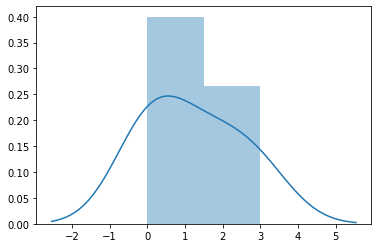

In [24]:
hist_clusters_kmeans = pd.Categorical(qtd_clusters_5).codes
sns.distplot(hist_clusters_kmeans)

#### KMeans para 10 clusters

In [25]:
clf_10 = KMeans(n_clusters = 10, init = 'k-means++',max_iter=200)
clf_10.fit(X)
clusters_kmeans_10 = clf_10.predict(X)
table_kmeans_10 = X
table_kmeans_10=pd.DataFrame(table_kmeans_10)
table_kmeans_10['clusters_kmeans'] = clusters_kmeans_10
qtd_clusters_10=table_kmeans_10['clusters_kmeans'].value_counts()

print("Cluster de indice [0] -> Num de instâncias: ",qtd_clusters_10[0])
print("Cluster de indice [1] -> Num de instâncias: ",qtd_clusters_10[1])
print("Cluster de indice [2] -> Num de instâncias: ",qtd_clusters_10[2])
print("Cluster de indice [3] -> Num de instâncias: ",qtd_clusters_10[3])
print("Cluster de indice [4] -> Num de instâncias: ",qtd_clusters_10[4])
print("Cluster de indice [5] -> Num de instâncias: ",qtd_clusters_10[5])
print("Cluster de indice [6] -> Num de instâncias: ",qtd_clusters_10[6])
print("Cluster de indice [7] -> Num de instâncias: ",qtd_clusters_10[7])
print("Cluster de indice [8] -> Num de instâncias: ",qtd_clusters_10[8])
print("Cluster de indice [9] -> Num de instâncias: ",qtd_clusters_10[9])

Cluster de indice [0] -> Num de instâncias:  1
Cluster de indice [1] -> Num de instâncias:  5
Cluster de indice [2] -> Num de instâncias:  2
Cluster de indice [3] -> Num de instâncias:  1
Cluster de indice [4] -> Num de instâncias:  4
Cluster de indice [5] -> Num de instâncias:  2
Cluster de indice [6] -> Num de instâncias:  1
Cluster de indice [7] -> Num de instâncias:  1
Cluster de indice [8] -> Num de instâncias:  2
Cluster de indice [9] -> Num de instâncias:  1


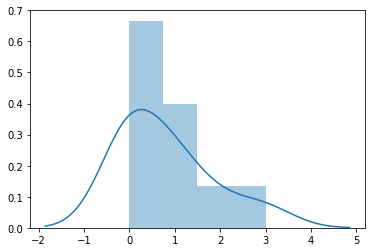

In [26]:
hist_clusters_kmeans = pd.Categorical(qtd_clusters_10).codes
sns.distplot(hist_clusters_kmeans)

#### KMeans para 20 clusters

In [27]:
clf_20 = KMeans(n_clusters = 20, init = 'k-means++',max_iter=200)
clf_20.fit(X)
clusters_kmeans_20 = clf_20.predict(X)

table_kmeans_20 = X

table_kmeans_20=pd.DataFrame(table_kmeans_20)

table_kmeans_20['clusters_kmeans'] = clusters_kmeans_20

qtd_clusters_20=table_kmeans_20['clusters_kmeans'].value_counts()

print("Cluster de indice [0] -> Num de instâncias: ",qtd_clusters_20[0])
print("Cluster de indice [1] -> Num de instâncias: ",qtd_clusters_20[1])
print("Cluster de indice [2] -> Num de instâncias: ",qtd_clusters_20[2])
print("Cluster de indice [3] -> Num de instâncias: ",qtd_clusters_20[3])
print("Cluster de indice [4] -> Num de instâncias: ",qtd_clusters_20[4])
print("Cluster de indice [5] -> Num de instâncias: ",qtd_clusters_20[5])
print("Cluster de indice [6] -> Num de instâncias: ",qtd_clusters_20[6])
print("Cluster de indice [7] -> Num de instâncias: ",qtd_clusters_20[7])
print("Cluster de indice [8] -> Num de instâncias: ",qtd_clusters_20[8])
print("Cluster de indice [9] -> Num de instâncias: ",qtd_clusters_20[9])

Cluster de indice [0] -> Num de instâncias:  1
Cluster de indice [1] -> Num de instâncias:  1
Cluster de indice [2] -> Num de instâncias:  1
Cluster de indice [3] -> Num de instâncias:  1
Cluster de indice [4] -> Num de instâncias:  1
Cluster de indice [5] -> Num de instâncias:  1
Cluster de indice [6] -> Num de instâncias:  1
Cluster de indice [7] -> Num de instâncias:  1
Cluster de indice [8] -> Num de instâncias:  1
Cluster de indice [9] -> Num de instâncias:  1


### Hierarquico
#### Hierarquico para 2 clusters

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy import cluster
import numpy as np , collections
import collections

Z = linkage(X,'ward','euclidean')
clusters_H = cluster.hierarchy.cut_tree(Z, n_clusters=2)
table_finale_H = X
table_finale_H = pd.DataFrame(table_finale_H)
table_finale_H['clusters_hierarquico'] = clusters_H
qtd_por_clusters_hier=table_finale_H['clusters_hierarquico'].value_counts()

print("Cluster de indice [0] -> Num de instâncias: ",qtd_por_clusters_hier[0])
print("Cluster de indice [1] -> Num de instâncias: ",qtd_por_clusters_hier[1])

Cluster de indice [0] -> Num de instâncias:  6
Cluster de indice [1] -> Num de instâncias:  14


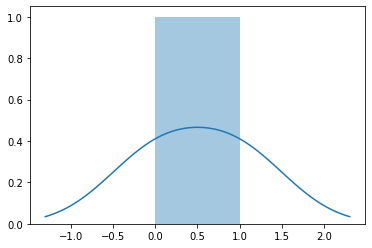

In [30]:
hist_clusters_kmeans = pd.Categorical(qtd_por_clusters_hier).codes
sns.distplot(hist_clusters_kmeans)

#### Hierarquico para 5 clusters

In [31]:
Z = linkage(X,'ward','euclidean')
clusters_H = cluster.hierarchy.cut_tree(Z, n_clusters=5)
table_finale_H = X
table_finale_H = pd.DataFrame(table_finale_H)
table_finale_H['clusters_hierarquico'] = clusters_H
qtd_por_clusters_hier=table_finale_H['clusters_hierarquico'].value_counts()

print("Cluster de indice [0] -> Num de instâncias: ",qtd_por_clusters_hier[0])
print("Cluster de indice [1] -> Num de instâncias: ",qtd_por_clusters_hier[1])
print("Cluster de indice [2] -> Num de instâncias: ",qtd_por_clusters_hier[2])
print("Cluster de indice [3] -> Num de instâncias: ",qtd_por_clusters_hier[3])
print("Cluster de indice [4] -> Num de instâncias: ",qtd_por_clusters_hier[4])

Cluster de indice [0] -> Num de instâncias:  1
Cluster de indice [1] -> Num de instâncias:  4
Cluster de indice [2] -> Num de instâncias:  1
Cluster de indice [3] -> Num de instâncias:  3
Cluster de indice [4] -> Num de instâncias:  11


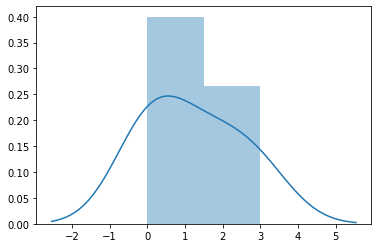

In [32]:
hist_clusters_kmeans = pd.Categorical(qtd_por_clusters_hier).codes
sns.distplot(hist_clusters_kmeans)

#### Hierarquico para 10 clusters

In [33]:
Z = linkage(X,'ward','euclidean')
clusters_H = cluster.hierarchy.cut_tree(Z, n_clusters=10)
table_finale_H = X
table_finale_H = pd.DataFrame(table_finale_H)
table_finale_H['clusters_hierarquico'] = clusters_H
qtd_por_clusters_hier=table_finale_H['clusters_hierarquico'].value_counts()

print("Cluster de indice [0] -> Num de instâncias: ",qtd_por_clusters_hier[0])
print("Cluster de indice [1] -> Num de instâncias: ",qtd_por_clusters_hier[1])
print("Cluster de indice [2] -> Num de instâncias: ",qtd_por_clusters_hier[2])
print("Cluster de indice [3] -> Num de instâncias: ",qtd_por_clusters_hier[3])
print("Cluster de indice [4] -> Num de instâncias: ",qtd_por_clusters_hier[4])
print("Cluster de indice [5] -> Num de instâncias: ",qtd_por_clusters_hier[5])
print("Cluster de indice [6] -> Num de instâncias: ",qtd_por_clusters_hier[6])
print("Cluster de indice [7] -> Num de instâncias: ",qtd_por_clusters_hier[7])
print("Cluster de indice [8] -> Num de instâncias: ",qtd_por_clusters_hier[8])
print("Cluster de indice [9] -> Num de instâncias: ",qtd_por_clusters_hier[9])

Cluster de indice [0] -> Num de instâncias:  1
Cluster de indice [1] -> Num de instâncias:  1
Cluster de indice [2] -> Num de instâncias:  1
Cluster de indice [3] -> Num de instâncias:  2
Cluster de indice [4] -> Num de instâncias:  1
Cluster de indice [5] -> Num de instâncias:  1
Cluster de indice [6] -> Num de instâncias:  2
Cluster de indice [7] -> Num de instâncias:  5
Cluster de indice [8] -> Num de instâncias:  4
Cluster de indice [9] -> Num de instâncias:  2


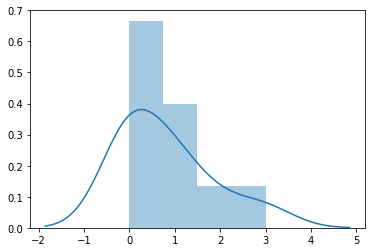

In [34]:
hist_clusters_kmeans = pd.Categorical(qtd_por_clusters_hier).codes
sns.distplot(hist_clusters_kmeans)

#### Hierarquico para 100 clusters

In [35]:
Z = linkage(X,'ward','euclidean')
clusters_H = cluster.hierarchy.cut_tree(Z, n_clusters=100)
table_finale_H = X
table_finale_H = pd.DataFrame(table_finale_H)
table_finale_H['clusters_hierarquico'] = clusters_H
qtd_por_clusters_hier=table_finale_H['clusters_hierarquico'].value_counts()

print("Cluster de indice [0] -> Num de instâncias: ",qtd_por_clusters_hier[0])
print("Cluster de indice [1] -> Num de instâncias: ",qtd_por_clusters_hier[1])
print("Cluster de indice [2] -> Num de instâncias: ",qtd_por_clusters_hier[2])
print("Cluster de indice [3] -> Num de instâncias: ",qtd_por_clusters_hier[3])
print("Cluster de indice [4] -> Num de instâncias: ",qtd_por_clusters_hier[4])
print("Cluster de indice [5] -> Num de instâncias: ",qtd_por_clusters_hier[5])
print("Cluster de indice [6] -> Num de instâncias: ",qtd_por_clusters_hier[6])
print("Cluster de indice [7] -> Num de instâncias: ",qtd_por_clusters_hier[7])
print("Cluster de indice [8] -> Num de instâncias: ",qtd_por_clusters_hier[8])
print("Cluster de indice [9] -> Num de instâncias: ",qtd_por_clusters_hier[9])

Cluster de indice [0] -> Num de instâncias:  1
Cluster de indice [1] -> Num de instâncias:  1
Cluster de indice [2] -> Num de instâncias:  1
Cluster de indice [3] -> Num de instâncias:  1
Cluster de indice [4] -> Num de instâncias:  1
Cluster de indice [5] -> Num de instâncias:  1
Cluster de indice [6] -> Num de instâncias:  1
Cluster de indice [7] -> Num de instâncias:  1
Cluster de indice [8] -> Num de instâncias:  1
Cluster de indice [9] -> Num de instâncias:  1


### Linkage
#### Usando linkage average em k = 10

In [37]:
Z = linkage(X,'average','euclidean')
clusters_H = cluster.hierarchy.cut_tree(Z, n_clusters=10)
table_finale_H = X
table_finale_H = pd.DataFrame(table_finale_H)
table_finale_H['clusters_hierarquico'] = clusters_H
qtd_por_clusters_hier=table_finale_H['clusters_hierarquico'].value_counts()

print("Cluster de indice [0] -> Num de instâncias: ",qtd_por_clusters_hier[0])
print("Cluster de indice [1] -> Num de instâncias: ",qtd_por_clusters_hier[1])
print("Cluster de indice [2] -> Num de instâncias: ",qtd_por_clusters_hier[2])
print("Cluster de indice [3] -> Num de instâncias: ",qtd_por_clusters_hier[3])
print("Cluster de indice [4] -> Num de instâncias: ",qtd_por_clusters_hier[4])
print("Cluster de indice [5] -> Num de instâncias: ",qtd_por_clusters_hier[5])
print("Cluster de indice [6] -> Num de instâncias: ",qtd_por_clusters_hier[6])
print("Cluster de indice [7] -> Num de instâncias: ",qtd_por_clusters_hier[7])
print("Cluster de indice [8] -> Num de instâncias: ",qtd_por_clusters_hier[8])
print("Cluster de indice [9] -> Num de instâncias: ",qtd_por_clusters_hier[9])

Cluster de indice [0] -> Num de instâncias:  1
Cluster de indice [1] -> Num de instâncias:  1
Cluster de indice [2] -> Num de instâncias:  1
Cluster de indice [3] -> Num de instâncias:  2
Cluster de indice [4] -> Num de instâncias:  1
Cluster de indice [5] -> Num de instâncias:  1
Cluster de indice [6] -> Num de instâncias:  2
Cluster de indice [7] -> Num de instâncias:  5
Cluster de indice [8] -> Num de instâncias:  4
Cluster de indice [9] -> Num de instâncias:  2


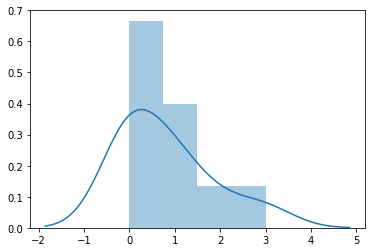

In [38]:
hist_clusters_kmeans = pd.Categorical(qtd_por_clusters_hier).codes
sns.distplot(hist_clusters_kmeans)

#### Usando linkage centroid em k = 10

In [39]:
Z = linkage(X,'centroid','euclidean')
clusters_H = cluster.hierarchy.cut_tree(Z, n_clusters=10)
table_finale_H = X
table_finale_H = pd.DataFrame(table_finale_H)
table_finale_H['clusters_hierarquico'] = clusters_H
qtd_por_clusters_hier=table_finale_H['clusters_hierarquico'].value_counts()

print("Cluster de indice [0] -> Num de instâncias: ",qtd_por_clusters_hier[0])
print("Cluster de indice [1] -> Num de instâncias: ",qtd_por_clusters_hier[1])
print("Cluster de indice [2] -> Num de instâncias: ",qtd_por_clusters_hier[2])
print("Cluster de indice [3] -> Num de instâncias: ",qtd_por_clusters_hier[3])
print("Cluster de indice [4] -> Num de instâncias: ",qtd_por_clusters_hier[4])
print("Cluster de indice [5] -> Num de instâncias: ",qtd_por_clusters_hier[5])
print("Cluster de indice [6] -> Num de instâncias: ",qtd_por_clusters_hier[6])
print("Cluster de indice [7] -> Num de instâncias: ",qtd_por_clusters_hier[7])
print("Cluster de indice [8] -> Num de instâncias: ",qtd_por_clusters_hier[8])
print("Cluster de indice [9] -> Num de instâncias: ",qtd_por_clusters_hier[9])

Cluster de indice [0] -> Num de instâncias:  1
Cluster de indice [1] -> Num de instâncias:  1
Cluster de indice [2] -> Num de instâncias:  1
Cluster de indice [3] -> Num de instâncias:  2
Cluster de indice [4] -> Num de instâncias:  1
Cluster de indice [5] -> Num de instâncias:  1
Cluster de indice [6] -> Num de instâncias:  2
Cluster de indice [7] -> Num de instâncias:  5
Cluster de indice [8] -> Num de instâncias:  4
Cluster de indice [9] -> Num de instâncias:  2


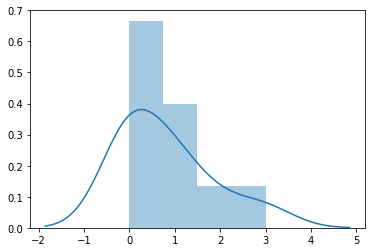

In [40]:
hist_clusters_kmeans = pd.Categorical(qtd_por_clusters_hier).codes
sns.distplot(hist_clusters_kmeans)

#### Usando linkage weighted em k = 10

In [41]:
Z = linkage(X,'weighted','euclidean')
clusters_H = cluster.hierarchy.cut_tree(Z, n_clusters=10)
table_finale_H = X
table_finale_H = pd.DataFrame(table_finale_H)
table_finale_H['clusters_hierarquico'] = clusters_H
qtd_por_clusters_hier=table_finale_H['clusters_hierarquico'].value_counts()

print("Cluster de indice [0] -> Num de instâncias: ",qtd_por_clusters_hier[0])
print("Cluster de indice [1] -> Num de instâncias: ",qtd_por_clusters_hier[1])
print("Cluster de indice [2] -> Num de instâncias: ",qtd_por_clusters_hier[2])
print("Cluster de indice [3] -> Num de instâncias: ",qtd_por_clusters_hier[3])
print("Cluster de indice [4] -> Num de instâncias: ",qtd_por_clusters_hier[4])
print("Cluster de indice [5] -> Num de instâncias: ",qtd_por_clusters_hier[5])
print("Cluster de indice [6] -> Num de instâncias: ",qtd_por_clusters_hier[6])
print("Cluster de indice [7] -> Num de instâncias: ",qtd_por_clusters_hier[7])
print("Cluster de indice [8] -> Num de instâncias: ",qtd_por_clusters_hier[8])
print("Cluster de indice [9] -> Num de instâncias: ",qtd_por_clusters_hier[9])

Cluster de indice [0] -> Num de instâncias:  1
Cluster de indice [1] -> Num de instâncias:  1
Cluster de indice [2] -> Num de instâncias:  1
Cluster de indice [3] -> Num de instâncias:  2
Cluster de indice [4] -> Num de instâncias:  1
Cluster de indice [5] -> Num de instâncias:  1
Cluster de indice [6] -> Num de instâncias:  2
Cluster de indice [7] -> Num de instâncias:  5
Cluster de indice [8] -> Num de instâncias:  4
Cluster de indice [9] -> Num de instâncias:  2


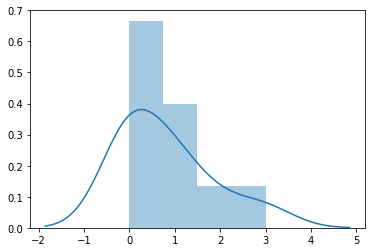

In [42]:
hist_clusters_kmeans = pd.Categorical(qtd_por_clusters_hier).codes
sns.distplot(hist_clusters_kmeans)

#### Usando linkage complete em k = 10

In [43]:
Z = linkage(X,'complete','euclidean')
clusters_H = cluster.hierarchy.cut_tree(Z, n_clusters=10)
table_finale_H = X
table_finale_H = pd.DataFrame(table_finale_H)
table_finale_H['clusters_hierarquico'] = clusters_H
qtd_por_clusters_hier=table_finale_H['clusters_hierarquico'].value_counts()

print("Cluster de indice [0] -> Num de instâncias: ",qtd_por_clusters_hier[0])
print("Cluster de indice [1] -> Num de instâncias: ",qtd_por_clusters_hier[1])
print("Cluster de indice [2] -> Num de instâncias: ",qtd_por_clusters_hier[2])
print("Cluster de indice [3] -> Num de instâncias: ",qtd_por_clusters_hier[3])
print("Cluster de indice [4] -> Num de instâncias: ",qtd_por_clusters_hier[4])
print("Cluster de indice [5] -> Num de instâncias: ",qtd_por_clusters_hier[5])
print("Cluster de indice [6] -> Num de instâncias: ",qtd_por_clusters_hier[6])
print("Cluster de indice [7] -> Num de instâncias: ",qtd_por_clusters_hier[7])
print("Cluster de indice [8] -> Num de instâncias: ",qtd_por_clusters_hier[8])
print("Cluster de indice [9] -> Num de instâncias: ",qtd_por_clusters_hier[9])

Cluster de indice [0] -> Num de instâncias:  1
Cluster de indice [1] -> Num de instâncias:  1
Cluster de indice [2] -> Num de instâncias:  1
Cluster de indice [3] -> Num de instâncias:  2
Cluster de indice [4] -> Num de instâncias:  1
Cluster de indice [5] -> Num de instâncias:  1
Cluster de indice [6] -> Num de instâncias:  2
Cluster de indice [7] -> Num de instâncias:  5
Cluster de indice [8] -> Num de instâncias:  4
Cluster de indice [9] -> Num de instâncias:  2


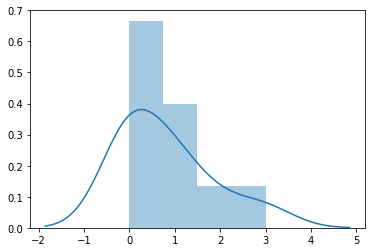

In [44]:
hist_clusters_kmeans = pd.Categorical(qtd_por_clusters_hier).codes
sns.distplot(hist_clusters_kmeans)

#### Pela análise dos gráficos gerados a partir dos experimentos, concluimos que o Hierarquico foi o melhor, dado que o mesmo fora o que obteve maior agrupamento de instancias.